In [1]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading the images
img = np.zeros(1108)
SOURCE = "content/drive/My Drive/Misc/road_detection/frames/"
contents = os.listdir(SOURCE)
contents.sort(key = lambda x: int(re.sub('.png','',x)))
col_images=[]
for i in tqdm_notebook(contents):
    img = cv2.imread('content/drive/My Drive/Misc/road_detection/frames/'+i)
    col_images.append(img)

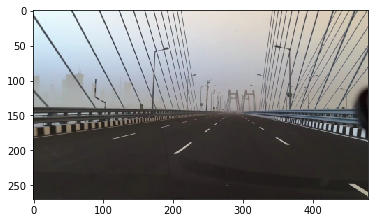

In [6]:
#Visualising one image
plt.imshow(col_images[0])

In [9]:
#Frame Masking
frame = np.zeros_like(col_images[0][:,:,0])

#polygon
polygon = np.array([[50,270], [220,160], [360,160], [480,270]])

#fill the polygon with ones
cv2.fillConvexPoly(frame, polygon, 1)



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

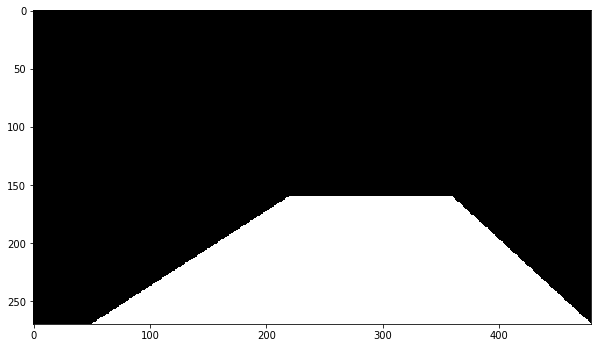

In [13]:
#plot polygon
plt.figure(figsize = (10,10))
plt.imshow(frame, cmap = "gray")
plt.show()

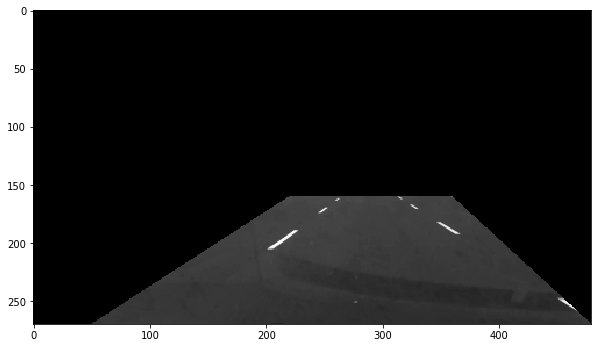

In [35]:
#applying the mask on the frame
img = cv2.bitwise_and(col_images[0][:,:,0], col_images[0][:,:,0], mask = frame)
#Doubt : Why applying mask only to one channel work?
#Doubt : What's the difference beteween bitwise_and and simply multiplying the mask with the first channel?
#Doubt : Output is unexpected
#Doubt : Why does using [:,:,1]/[:,:,2] also give the same result? shouldnt it be greeninsh/reddish?
plt.figure(figsize = (10,10))
plt.imshow(img, cmap="gray")
plt.show()



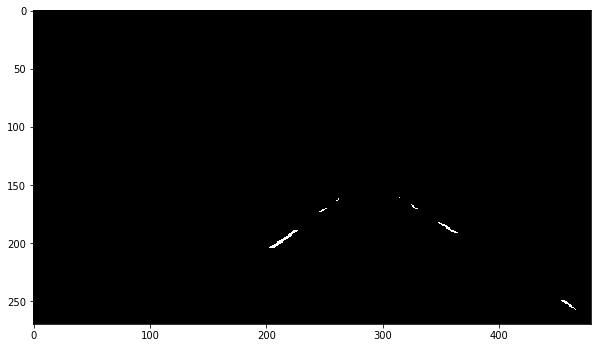

In [30]:
#image thresholding
ret, thresh = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY) 
#Doubt : Why setting the max val as 130,145,etc. also give the sme result?
plt.figure(figsize = (10,10))
plt.imshow(thresh, cmap = "gray")
plt.show()